In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data =pd.read_csv('Womens Clothing E-Commerce Reviews.csv')


In [3]:
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
data[data['Review Text'].isnull()].count()


Unnamed: 0                 845
Clothing ID                845
Age                        845
Title                        1
Review Text                  0
Rating                     845
Recommended IND            845
Positive Feedback Count    845
Division Name              844
Department Name            844
Class Name                 844
dtype: int64

In [7]:
data[data['Rating'].isnull()]


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name


In [8]:
data['Rating'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 23486 entries, 0 to 23485
Series name: Rating
Non-Null Count  Dtype
--------------  -----
23486 non-null  int64
dtypes: int64(1)
memory usage: 183.6 KB


In [9]:
data[data['Title'].isnull()].count()


Unnamed: 0                 3810
Clothing ID                3810
Age                        3810
Title                         0
Review Text                2966
Rating                     3810
Recommended IND            3810
Positive Feedback Count    3810
Division Name              3809
Department Name            3809
Class Name                 3809
dtype: int64

In [10]:
# replacing the null values in rating with neutral response
filtered_data = data[data["Rating"]==2]

In [11]:
filtered_data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
22,22,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses
26,26,949,33,Huge disappointment,I have been waiting for this sweater coat to s...,2,0,0,General,Tops,Sweaters
33,33,949,36,Mehh,"I ordered this 3 months ago, and it finally ca...",2,0,0,General,Tops,Sweaters
56,56,368,33,NaN,I am pregnant and i thought this would be a gr...,2,0,3,Initmates,Intimate,Intimates
...,...,...,...,...,...,...,...,...,...,...,...
23391,23391,884,45,Tight in all the wrong places...,"The model looks awesome in this cute top, but ...",2,0,3,General Petite,Tops,Knits
23405,23405,931,47,"Very big, scratchy","I'm petite, and i knew buying this that it wou...",2,0,0,General,Tops,Sweaters
23424,23424,854,58,Extremely sheer!,Before i ordered this i noted the other review...,2,0,0,General Petite,Tops,Knits
23427,23427,854,42,Sheer shirt,What drew me to this shirt was the beautiful s...,2,0,65,General Petite,Tops,Knits


In [12]:
data["Rating"].isnull().describe()


count     23486
unique        1
top       False
freq      23486
Name: Rating, dtype: object

In [13]:
rep_nan = {
    1: 'Poor Unflattering Itchy tags Bad worst sad Disappointed Ugly Terrible',
    2: 'Not',
    3: 'Fair flaws cheap Boring Awkward',
    4: 'perfect pretty ',
    5: 'Flattering Love cute fun perfect Versatile great beautiful Compliments Gorgeous'
}

In [14]:
data.loc[data['Title'].isnull(), 'Title'] = data[data['Title'].isnull()]['Rating'].replace(rep_nan)
data.loc[data['Review Text'].isnull(), 'Review Text'] = data[data['Review Text'].isnull()]['Rating'].replace(rep_nan)
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,perfect pretty,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,Flattering Love cute fun perfect Versatile gre...,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [15]:
df1=data[['Title','Review Text','Rating']]
df1.head()

,Title,Review Text,Rating
0,perfect pretty,Absolutely wonderful - silky and sexy and comf...,4
1,Flattering Love cute fun perfect Versatile gre...,Love this dress! it's sooo pretty. i happene...,5
2,Some major design flaws,I had such high hopes for this dress and reall...,3
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Flattering shirt,This shirt is very flattering to all due to th...,5


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [17]:
df1['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [18]:
sentences = data['Review Text']
data['Rating']=le.fit_transform(data['Rating'])

labels = data['Rating']
sentences = np.array(sentences)
labels = np.array(labels)
sentences.shape,labels.shape

((23486,), (23486,))

In [19]:
23486*.80

18788.8

In [20]:
training_sentences = sentences[0:18788]
testing_sentences = sentences[18788:]
training_labels = labels[0:18788]
testing_labels = labels[18788:]

In [21]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=200, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=200, padding='post', truncating='post')

In [22]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(10000,16,input_length=200))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(25,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='softmax'))
opt = tf.keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 50)                850       
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 5)                 130       
                                                        

In [24]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [25]:
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),callbacks=[early_stopping])

Epoch 1/100
588/588 [==============================] - 4s 5ms/step - loss: 1.2187 - accuracy: 0.5550 - val_loss: 1.1108 - val_accuracy: 0.5492
Epoch 2/100
588/588 [==============================] - 2s 4ms/step - loss: 0.9263 - accuracy: 0.6185 - val_loss: 0.9214 - val_accuracy: 0.6015
Epoch 3/100
588/588 [==============================] - 2s 4ms/step - loss: 0.8425 - accuracy: 0.6474 - val_loss: 0.9040 - val_accuracy: 0.6135
Epoch 4/100
588/588 [==============================] - 2s 4ms/step - loss: 0.8077 - accuracy: 0.6591 - val_loss: 0.8797 - val_accuracy: 0.6188
Epoch 5/100
588/588 [==============================] - 2s 4ms/step - loss: 0.7776 - accuracy: 0.6705 - val_loss: 0.8818 - val_accuracy: 0.6271
Epoch 6/100
588/588 [==============================] - 2s 4ms/step - loss: 0.7507 - accuracy: 0.6820 - val_loss: 0.8653 - val_accuracy: 0.6337
Epoch 7/100
588/588 [==============================] - 2s 4ms/step - loss: 0.7234 - accuracy: 0.6916 - val_loss: 0.8732 - val_accuracy: 0.6354

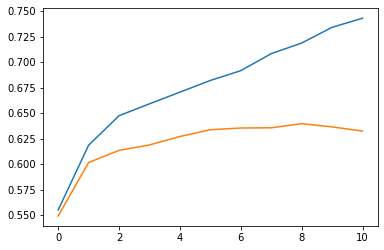

In [26]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.show()

In [27]:
loss, acc = model.evaluate(testing_padded, testing_labels)


147/147 [==============================] - 0s 2ms/step - loss: 0.8640 - accuracy: 0.6356


In [28]:
y_pred = model.predict(testing_padded)


147/147 [==============================] - 0s 1ms/step


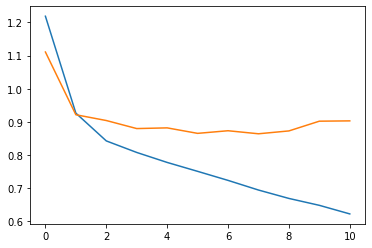

In [29]:
plt.plot(history.history["loss"], label="Train Accuracy")
plt.plot(history.history["val_loss"], label="Val Accuracy")
plt.show()